## Read and clip data to JP extent

In [39]:
import os
import xarray
import numpy
import matplotlib.pyplot as plt

In [40]:
MOD11L2_GEO_FOLDER = '/disk2/Data/MOD11L2_Emissivity'

In [41]:
# JP extent
resolution = 0.01 # degree
lats = numpy.arange(50.-resolution/2, 20, -resolution)
lons = numpy.arange(120.+resolution/2, 150, resolution)

In [63]:
mod11_filelist = os.listdir(MOD11L2_GEO_FOLDER)

mod11_file = os.path.join(MOD11L2_GEO_FOLDER, 'MOD11A1.061_Emis_31_doy2018001_aid0001.tif')
mod11_filename = os.path.join(MOD11L2_GEO_FOLDER, mod11_file)
modis_ds = xarray.open_rasterio(mod11_filename)[0]
jp_ds = modis_ds.interp(x=lons, y=lats, method="linear", kwargs={"fill_value": "extrapolate"}) # nearest
data_v = jp_ds.values*0.002+0.49

/disk2/Data/MOD11L2_Emissivity/MOD11A1.061_Emis_31_doy2018001_aid0001.tif


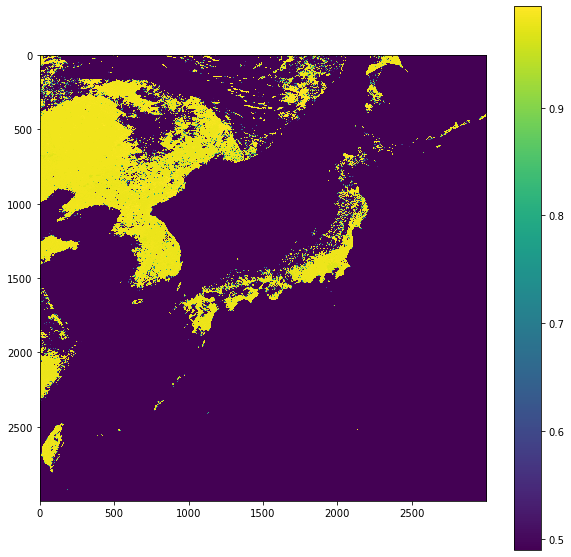

In [71]:
print(mod11_file)
data_show = numpy.copy(data_v)
data_show[data_show<0]=numpy.NaN

fig, ax = plt.subplots(figsize=(10, 10))
plt.imshow(data_show, interpolation='None')
plt.colorbar()